------------------
------------------

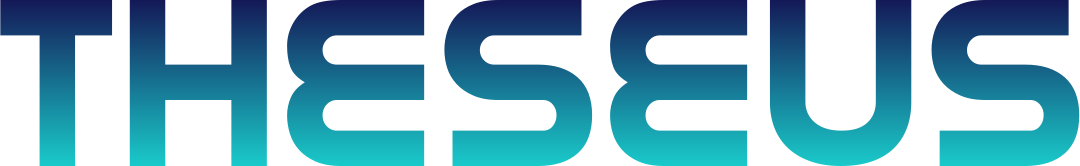

------------------
------------------

# Preproccessing Training/Testing Data (Input and Output) (v0.1)

### PROJECT THESEUS (v0.1) - PART 3
------------------

Artash Nath, UTAT Orbit Member

-------------------

To train a machine learning model, input data needs to be normalized and then split into a training and testing dataset.

This notebook loads the 

-------------------

<b>1. Importing Libraries</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import random

----------------------

<b>2. Load Position / Effect Vectors Data</b>

In [2]:
position_data = np.load('./data/position_data.npy')
effect_data = np.load('./data/effect_data.npy')

-----------------------

<b>3. Calculate Minimums and Maximums of Data</b>

In [3]:
position_minimums = np.array([(position_data[:,i]).min() for i in range(0,6)])
position_maximums = np.array([(position_data[:,i]).max() for i in range(0,6)])

effect_minimums = np.array([(effect_data[:,i]).min() for i in range(0,6)])
effect_maximums = np.array([(effect_data[:,i]).max() for i in range(0,6)])
                             
                             
np.save('./DATA/NORMALIZATION/position_minimums', position_minimums)
np.save('./DATA/NORMALIZATION/position_maximums', position_maximums)
np.save('./DATA/NORMALIZATION/effect_minimums', effect_minimums)
np.save('./DATA/NORMALIZATION/effect_maximums', effect_maximums)

-----------------------

<b>4. Use Minimums and Maximums to Normalize Position and Effect Data</b>

In [4]:
position_data[:,0] = (position_data[:,0] - position_minimums[0])/(position_maximums[0] - position_minimums[0])
position_data[:,1] = (position_data[:,1] - position_minimums[1])/(position_maximums[1] - position_minimums[1])
position_data[:,2] = (position_data[:,2] - position_minimums[2])/(position_maximums[2] - position_minimums[2])
position_data[:,3] = (position_data[:,3] - position_minimums[3])/(position_maximums[3] - position_minimums[3])
position_data[:,4] = (position_data[:,4] - position_minimums[4])/(position_maximums[4] - position_minimums[4])
position_data[:,5] = (position_data[:,5] - position_minimums[5])/(position_maximums[5] - position_minimums[5])


effect_data[:,0] = (effect_data[:,0] - effect_minimums[0])/(effect_maximums[0] - effect_minimums[0])
effect_data[:,1] = (effect_data[:,1] - effect_minimums[1])/(effect_maximums[1] - effect_minimums[1])
effect_data[:,2] = (effect_data[:,2] - effect_minimums[2])/(effect_maximums[2] - effect_minimums[2])
effect_data[:,3] = (effect_data[:,3] - effect_minimums[3])/(effect_maximums[3] - effect_minimums[3])
effect_data[:,4] = (effect_data[:,4] - effect_minimums[4])/(effect_maximums[4] - effect_minimums[4])
effect_data[:,5] = (effect_data[:,5] - effect_minimums[5])/(effect_maximums[5] - effect_minimums[5])

-----------------------

<b>5. Randomize Position and Effect Data in Unision and split to Train / Test Data with 80% - 20% Ratio</b>

In [5]:
randomize = np.arange(len(position_data))
np.random.shuffle(randomize)
position_data = position_data[randomize]
effect_data = effect_data[randomize]

In [6]:
train_inputs = position_data[:int(len(effect_data)*0.8)]
train_outputs = effect_data[:int(len(effect_data)*0.8)]

test_inputs = position_data[int(len(effect_data)*0.8):]
test_outputs = effect_data[int(len(effect_data)*0.8):]

In [7]:
print("Train Inputs : {}".format(np.shape(train_inputs)))
print("Train Outputs : {}".format(np.shape(train_outputs)))
print()
print("Test Inputs : {}".format(np.shape(test_inputs)))
print("Test Outputs : {}".format(np.shape(test_outputs)))

Train Inputs : (21600000, 6)
Train Outputs : (21600000, 6)

Test Inputs : (5400000, 6)
Test Outputs : (5400000, 6)


-----------------------

<b>5. Save Training and Testing Data</b>

In [9]:
np.save('./DATA/ML DATA/Train_Inputs', train_inputs)
np.save('./DATA/ML DATA/Train_Outputs', train_outputs)

np.save('./DATA/ML DATA/Test_Inputs', test_inputs)
np.save('./DATA/ML DATA/Test_Outputs', test_outputs)